Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 418ms/step - accuracy: 0.6580 - loss: 0.6314 - val_accuracy: 0.8213 - val_loss: 0.4644
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 208ms/step - accuracy: 0.8130 - loss: 0.4639 - val_accuracy: 0.8845 - val_loss: 0.3636
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 218ms/step - accuracy: 0.8807 - loss: 0.3620 - val_accuracy: 0.8989 - val_loss: 0.3246
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.8889 - loss: 0.3344 - val_accuracy: 0.9025 - val_loss: 0.2894
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.8981 - loss: 0.2948 - val_accuracy: 0.9061 - val_loss: 0.2732
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - accuracy: 0.8986 - loss: 0.2845 - val_accuracy: 0.9097 - val_loss: 0.2647
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.9110 - loss: 0.2656 - val_accuracy: 0.8989 - val_loss: 0.2788
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.9065 - loss: 0.2691 - val_accu

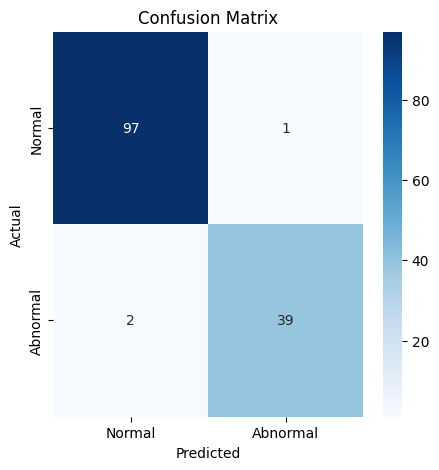

Model: "Hybrid_Transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ECG_Input (InputLayer)    │ (None, 200, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ PCG_Input (InputLayer)    │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ecg_transformer           │ (None, 256)            │      2,369,024 │ ECG_Input[0][0]        │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pcg_transformer           │ (None, 256)            │      2,433,280 │ PCG_Input[0][0]        │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512)            │              0 │ ecg_transformer[0][0], │
│                           │                        │                │ pcg_transformer[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 256)            │        131,328 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 1, 256)         │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_block         │ (None, 1, 256)         │      2,367,488 │ reshape_1[0][0]        │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 256)            │              0 │ transformer_block[0][… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stacked_transformer_ense… │ (None, 256)            │      4,802,304 │ ECG_Input[0][0],       │
│ (Functional)              │                        │                │ PCG_Input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 512)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ stacked_transformer_e… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 2)              │          1,026 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,906,440 (83.57 MB)

 Trainable params: 7,302,146 (27.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,604,294 (55.71 MB)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from scipy.io import wavfile
from scipy.signal import stft
import wfdb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
PATCH_SIZE = 16
EMBED_DIM = 256
NUM_HEADS = 8
FF_DIM = 512
DROPOUT_RATE = 0.3
NUM_CLASSES = 2
INPUT_ECG_SHAPE = (200, 1)
INPUT_PCG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 1)
BATCH_SIZE = 64
EPOCHS = 25
LEARNING_RATE = 1e-5

# Helper function to compute PCG spectrogram
def compute_spectrogram(filepath):
    sample_rate, signal = wavfile.read(filepath)
    frequencies, times, spectrogram = stft(signal, fs=sample_rate, nperseg=256)
    spectrogram = np.log(np.abs(spectrogram) + 1e-10)
    spectrogram = np.resize(spectrogram, (IMG_HEIGHT, IMG_WIDTH))
    return spectrogram

# Load PCG dataset with augmentation for abnormal cases
def load_pcg_dataset(normal_dir, abnormal_dir):
    data, labels = [], []
    for label, directory in enumerate([normal_dir, abnormal_dir]):
        for filename in os.listdir(directory):
            if filename.endswith(".wav"):
                filepath = os.path.join(directory, filename)
                spectrogram = compute_spectrogram(filepath)
                data.append(spectrogram)
                labels.append(label)
                # Augment abnormal data by flipping
                if label == 1:
                    flipped_spectrogram = np.flip(spectrogram, axis=1)
                    data.append(flipped_spectrogram)
                    labels.append(label)
    return np.array(data), np.array(labels)

# Load ECG dataset
def load_clean_ecg_data(data_path):
    records = [f.split('.')[0] for f in os.listdir(data_path) if f.endswith('.dat')]
    X, Y = [], []
    for record in records:
        signal, fields = wfdb.rdsamp(os.path.join(data_path, record))
        ann = wfdb.rdann(os.path.join(data_path, record), 'atr')
        for i in range(len(ann.sample)):
            if i == 0 or i == len(ann.sample) - 1:
                continue
            r_peak = ann.sample[i]
            start = r_peak - 100
            end = r_peak + 100
            if start < 0 or end > len(signal):
                continue
            heartbeat = signal[start:end, 0]
            X.append(heartbeat)
            Y.append(ann.symbol[i])
    return np.array(X), np.array(Y)

# Map ECG labels to binary classes
def label_ecg(y):
    normal_classes = ['N', 'L', 'R']
    return 0 if y in normal_classes else 1

# Data paths
pcg_normal_dir = "/content/drive/MyDrive/Colab Notebooks/physionet_challenge_2016/Normal"
pcg_abnormal_dir = "/content/drive/MyDrive/Colab Notebooks/physionet_challenge_2016/Abnormal"
ecq_data_path = "/content/drive/MyDrive/Colab Notebooks/test_data/physionet.org/files/mitdb/1.0.0"

# Load and preprocess PCG data
pcg_data, pcg_labels = load_pcg_dataset(pcg_normal_dir, pcg_abnormal_dir)
pcg_data = pcg_data / np.max(pcg_data)
pcg_data = np.expand_dims(pcg_data, -1)
pcg_labels = tf.keras.utils.to_categorical(pcg_labels, NUM_CLASSES)

# Load and preprocess ECG data
X_clean, Y_clean = load_clean_ecg_data(ecq_data_path)
scaler = StandardScaler()
X_clean = np.array([scaler.fit_transform(x.reshape(-1, 1)).flatten() for x in X_clean])
Y_clean = np.array([label_ecg(y) for y in Y_clean])

# Apply SMOTE to balance ECG dataset
smote = SMOTE(random_state=42)
X_clean, Y_clean = smote.fit_resample(X_clean, Y_clean)
Y_clean = tf.keras.utils.to_categorical(Y_clean, NUM_CLASSES)
X_clean = X_clean[..., np.newaxis]

# Balance datasets
min_samples = min(len(X_clean), len(pcg_data))
X_clean, Y_clean = shuffle(X_clean[:min_samples], Y_clean[:min_samples], random_state=42)
pcg_data, pcg_labels = shuffle(pcg_data[:min_samples], pcg_labels[:min_samples], random_state=42)

# Train-test split
x_train_pcg, x_test_pcg, y_train_pcg, y_test_pcg = train_test_split(pcg_data, pcg_labels, test_size=0.1, random_state=42)
x_val_pcg, x_test_pcg, y_val_pcg, y_test_pcg = train_test_split(x_test_pcg, y_test_pcg, test_size=0.2, random_state=42)

x_train_ecg, x_test_ecg, y_train_ecg, y_test_ecg = train_test_split(X_clean, Y_clean, test_size=0.1, random_state=42)
x_val_ecg, x_test_ecg, y_val_ecg, y_test_ecg = train_test_split(x_test_ecg, y_test_ecg, test_size=0.2, random_state=42)
# Patch Embedding Layer for PCG
# Patch Embedding Layer for PCG
def patch_embedding(input_shape, patch_size, embed_dim):
    inputs = layers.Input(shape=input_shape)
    patches = layers.Conv2D(embed_dim, (patch_size, patch_size), strides=(patch_size, patch_size))(inputs)
    flat_patches = layers.Reshape((-1, embed_dim))(patches)
    return models.Model(inputs, flat_patches, name="patch_embedding")

# Transformer Block
def transformer_block(embed_dim, num_heads, ff_dim, dropout_rate):
    inputs = layers.Input(shape=(None, embed_dim))
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(inputs, inputs)
    attention_output = layers.Dropout(dropout_rate)(attention_output)
    attention_output = layers.LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    ffn_output = layers.Dense(ff_dim, activation='relu')(attention_output)
    ffn_output = layers.Dense(embed_dim)(ffn_output)
    ffn_output = layers.Dropout(dropout_rate)(ffn_output)
    outputs = layers.LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

    return models.Model(inputs, outputs, name="transformer_block")

# ECG Transformer Model
def ecg_transformer(input_shape, embed_dim, num_heads, ff_dim, dropout_rate):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(embed_dim, kernel_size=3, strides=1, padding='same')(inputs)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = transformer_block(embed_dim, num_heads, ff_dim, dropout_rate)(x)
    x = layers.GlobalAveragePooling1D()(x)
    return models.Model(inputs, x, name="ecg_transformer")

# PCG Transformer Model
def pcg_transformer(input_shape, patch_size, embed_dim, num_heads, ff_dim, dropout_rate):
    inputs = layers.Input(shape=input_shape)
    x = patch_embedding(input_shape, patch_size, embed_dim)(inputs)
    x = transformer_block(embed_dim, num_heads, ff_dim, dropout_rate)(x)
    x = layers.GlobalAveragePooling1D()(x)
    return models.Model(inputs, x, name="pcg_transformer")

# Multimodal Fusion Transformer
def fusion_transformer(ecg_output, pcg_output, embed_dim, num_heads, ff_dim, dropout_rate):
    combined = layers.Concatenate()([ecg_output, pcg_output])
    combined = layers.Dense(embed_dim)(combined)
    combined = layers.Reshape((1, embed_dim))(combined)

    combined = transformer_block(embed_dim, num_heads, ff_dim, dropout_rate)(combined)
    combined = layers.GlobalAveragePooling1D()(combined)
    return combined

# Stacked Transformer Ensemble with Weighted Voting
def stacked_transformer_ensemble(models_list, weights):
    inputs = [layers.Input(shape=model.input_shape[1:]) for model in models_list]
    outputs = [model(input) for model, input in zip(models_list, inputs)]
    weighted_outputs = [layers.Lambda(lambda x: x * weight)(output) for output, weight in zip(outputs, weights)]
    stacked_output = layers.Average()(weighted_outputs)
    return models.Model(inputs, stacked_output, name="stacked_transformer_ensemble")

# Final Hybrid Model
def hybrid_transformer_model():
    ecg_input = layers.Input(shape=INPUT_ECG_SHAPE, name="ECG_Input")
    pcg_input = layers.Input(shape=INPUT_PCG_SHAPE, name="PCG_Input")

    ecg_model = ecg_transformer(INPUT_ECG_SHAPE, EMBED_DIM, NUM_HEADS, FF_DIM, DROPOUT_RATE)
    pcg_model = pcg_transformer(INPUT_PCG_SHAPE, PATCH_SIZE, EMBED_DIM, NUM_HEADS, FF_DIM, DROPOUT_RATE)

    ecg_output = ecg_model(ecg_input)
    pcg_output = pcg_model(pcg_input)

    fusion_output = fusion_transformer(ecg_output, pcg_output, EMBED_DIM, NUM_HEADS, FF_DIM, DROPOUT_RATE)

    # Stacked Transformer Ensemble
    models_list = [ecg_model, pcg_model]
    weights = [0.5, 0.5]  # Adjust weights based on model performance
    stacked_output = stacked_transformer_ensemble(models_list, weights)([ecg_input, pcg_input])

    # Combine Fusion and Stacked Outputs
    combined_output = layers.Concatenate()([fusion_output, stacked_output])
    outputs = layers.Dense(NUM_CLASSES, activation='sigmoid')(combined_output)

    model = models.Model(inputs=[ecg_input, pcg_input], outputs=outputs, name="Hybrid_Transformer")
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss=losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

    return model

model = hybrid_transformer_model()
history = model.fit(
    [x_train_ecg, x_train_pcg], y_train_ecg,
    validation_data=([x_val_ecg, x_val_pcg], y_val_ecg),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)
y_pred_prob = model.predict([x_test_ecg, x_test_pcg])
y_pred = (y_pred_prob[:, 1] > 0.4).astype(int)  # Adjusted threshold for better recall
y_true = np.argmax(y_test_ecg, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))
print("AUC-ROC:", roc_auc_score(y_true, y_pred_prob[:, 1]))

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

model.summary()



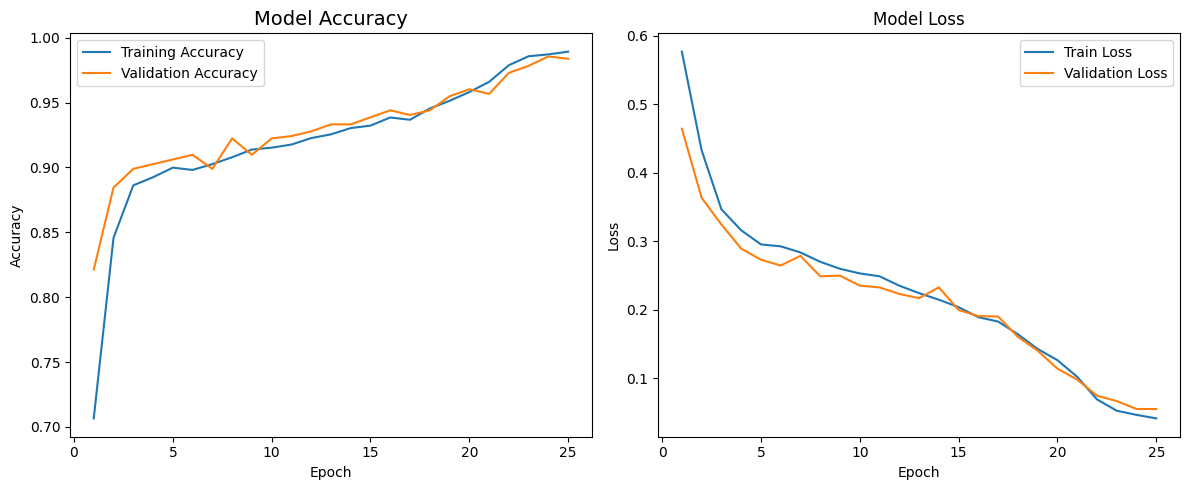

In [ ]:
import matplotlib.pyplot as plt

# Extract data from history
train_accuracy = history.history.get('accuracy', [])
val_accuracy = history.history.get('val_accuracy', [])
train_loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])

epochs = range(1, len(train_accuracy) + 1)

# Plotting model accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting model loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss')  # Updated training color
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Set DPI to 300
plt.tight_layout()
plt.savefig('Hybrid_model.png', dpi=300)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.97      0.95      0.96        41

    accuracy                           0.98       139
   macro avg       0.98      0.97      0.97       139
weighted avg       0.98      0.98      0.98       139



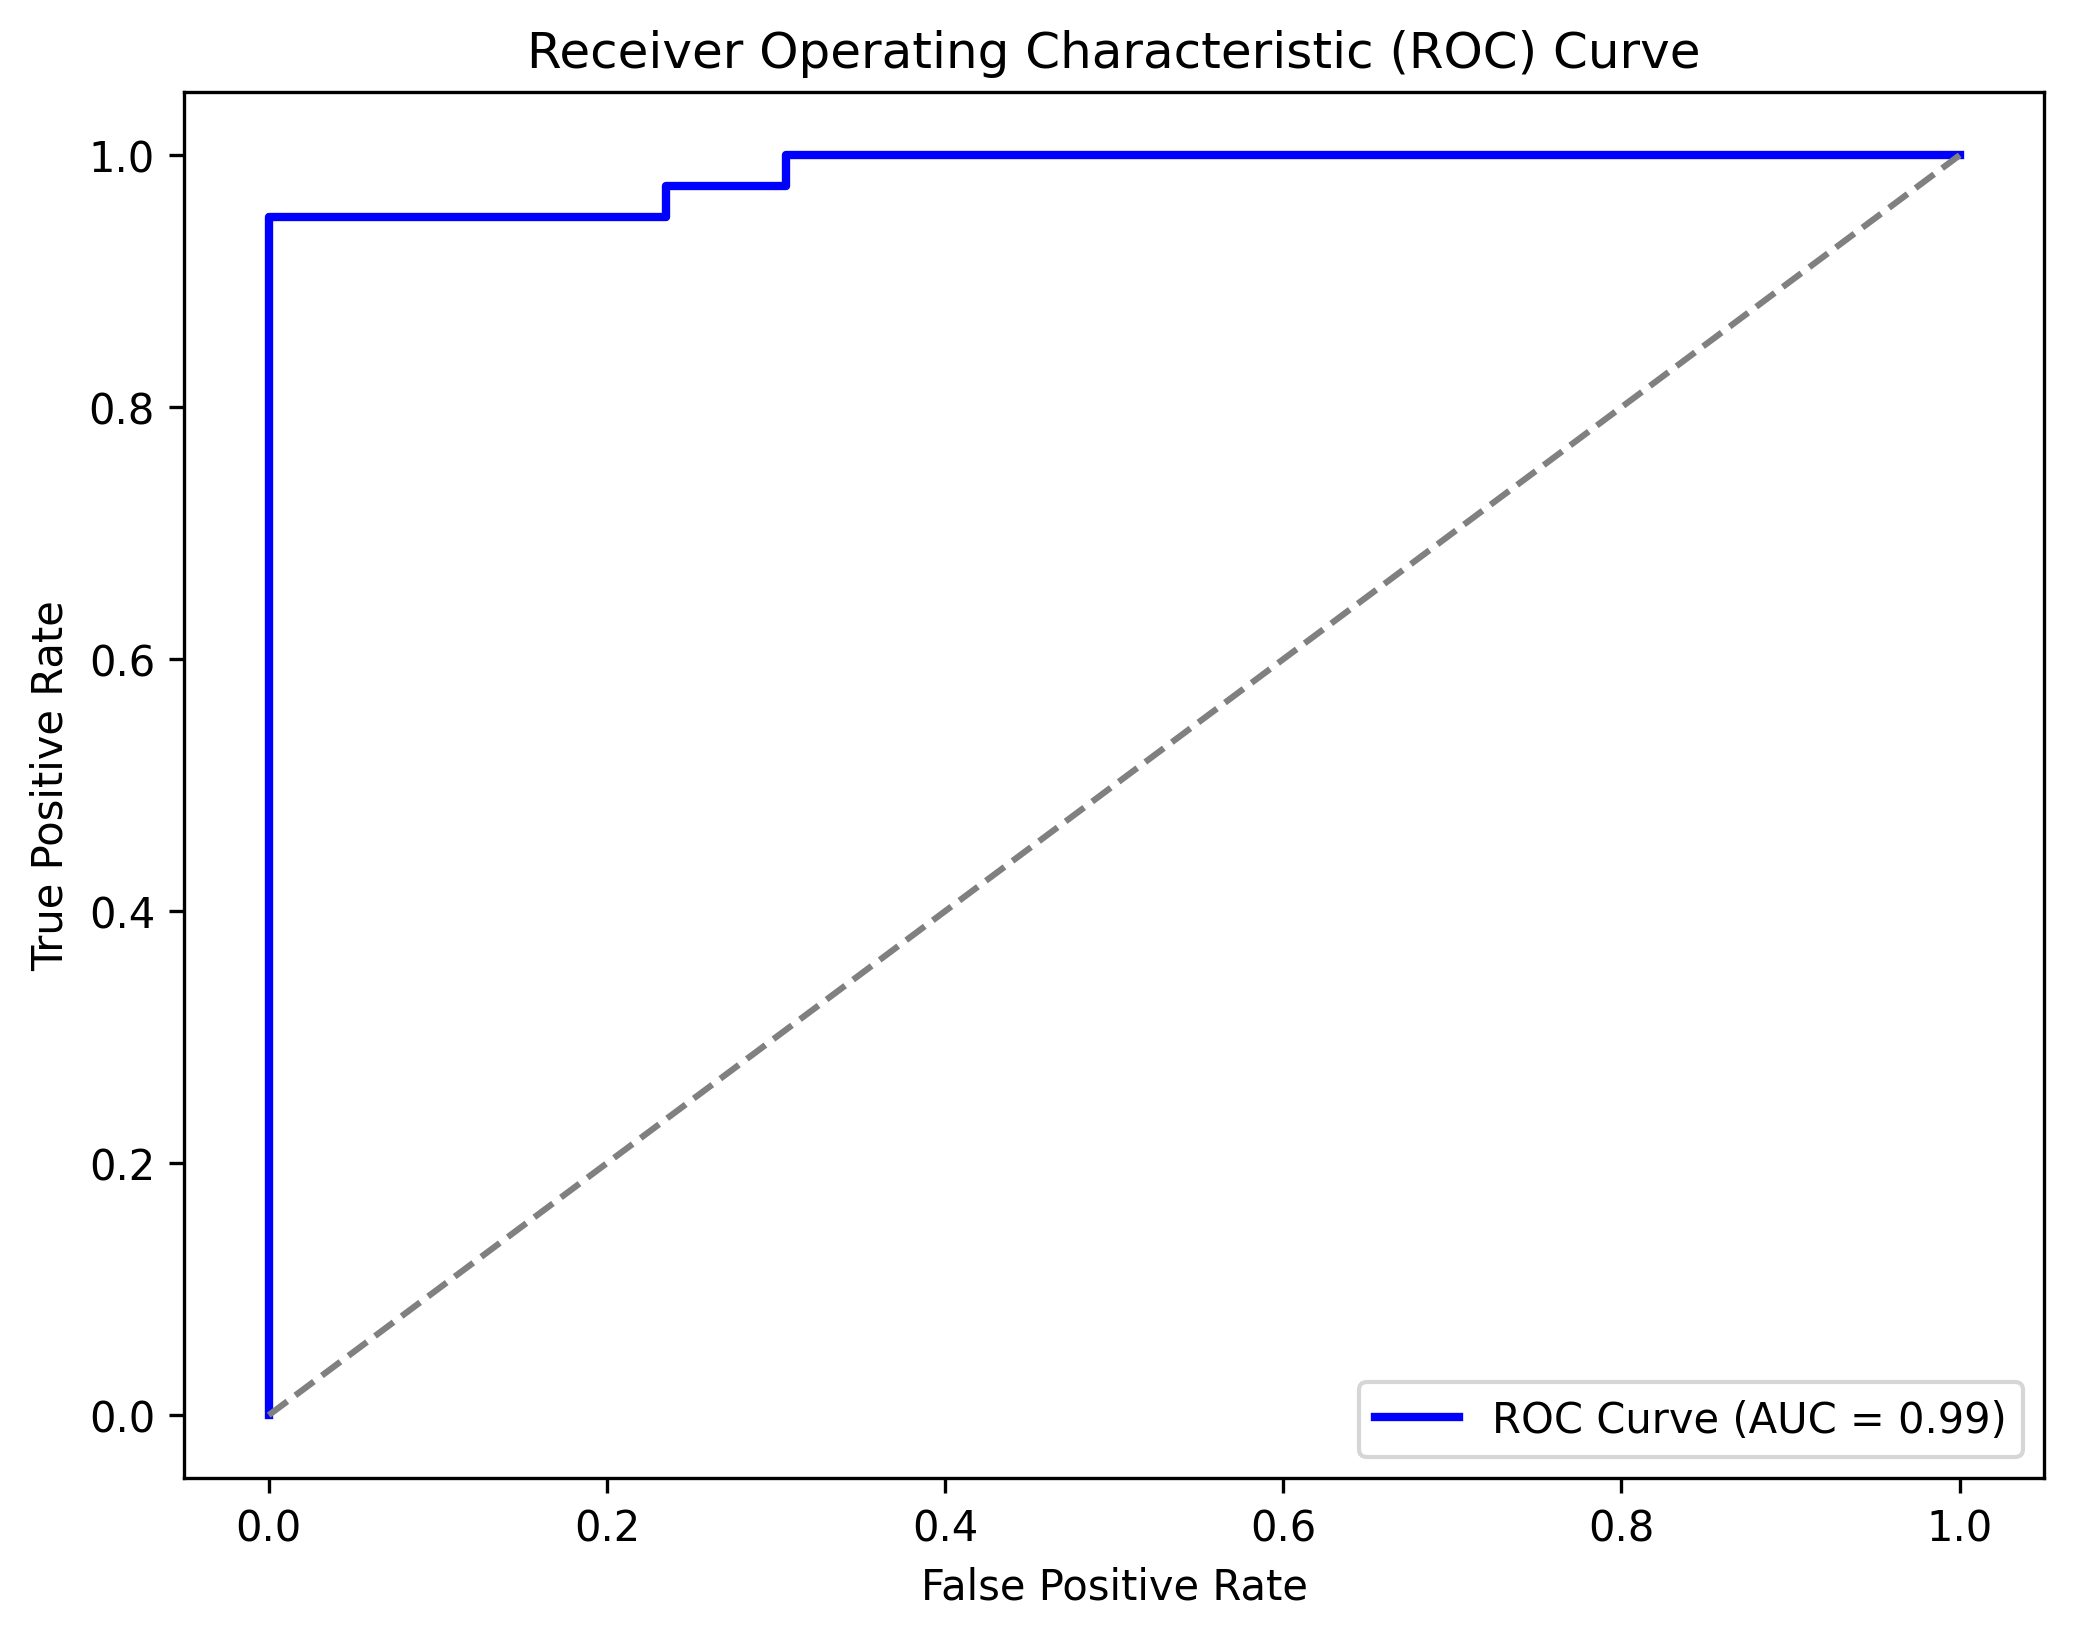

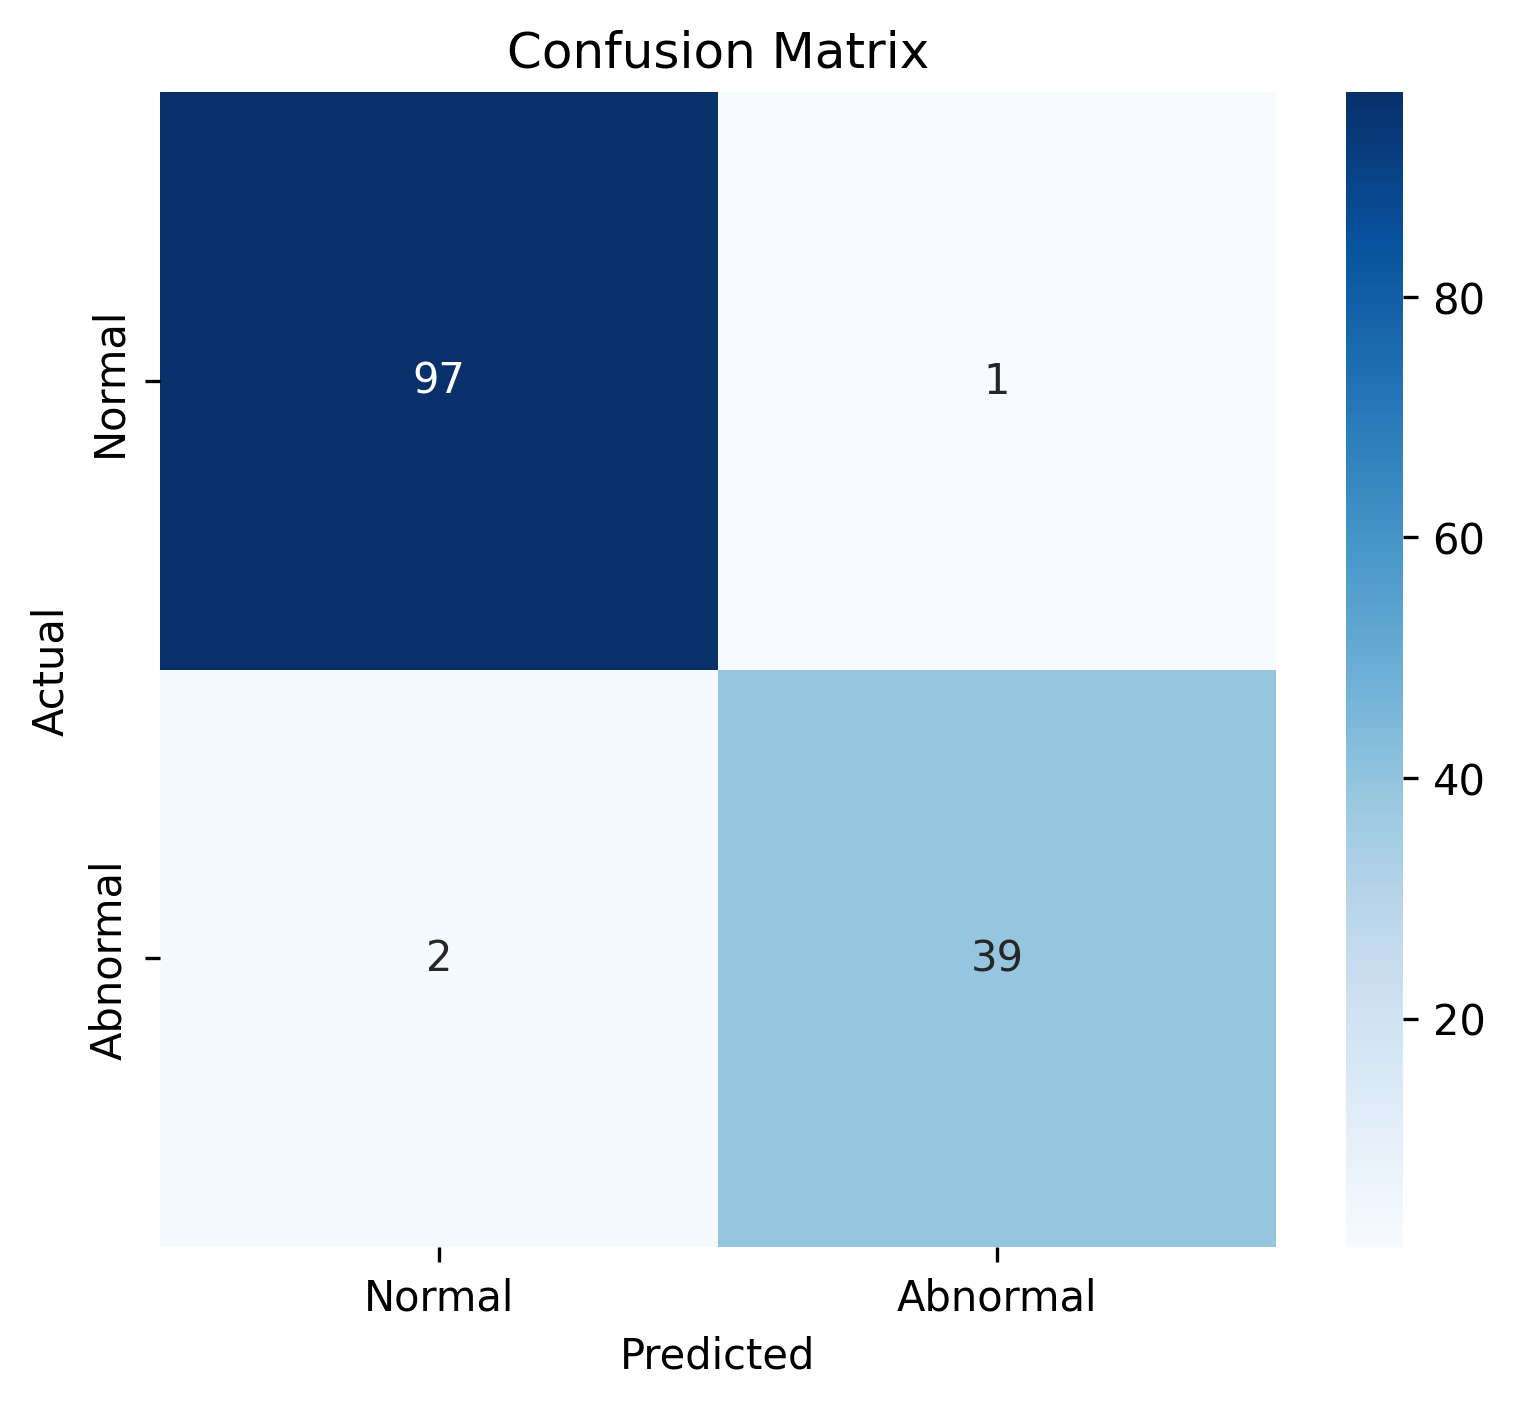

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred_probs = model.predict([x_test_ecg, x_test_pcg])  # Probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test_ecg, axis=1)  # True labels (assuming same for ECG & PCG)

# Compute ROC AUC Score
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Generate Classification Report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot ROC Curve
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("roc_curve.png", dpi=300)  # Save at 300 dpi
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 5), dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300)  # Save at 300 dpi
plt.show()


In [ ]:
# Save the trained model to a file
model.save('/content/drive/MyDrive/Colab Notebooks/Updated_hybrid_transformer_model.keras')
print("Model saved as 'hybrid_transformer_model.keras'")


Model saved as 'hybrid_transformer_model.keras'
